In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
data = pd.read_csv('drug_consumption.data')

In [140]:
pd.options.display.max_columns = 30

In [141]:
data.head()

,id,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,impulsive,SS,alcohol,amphet,...,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,...,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,...,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,...,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,...,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,...,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [142]:
data.set_index('id', inplace=True)

In [148]:
test  = drugs.iloc[:,0]
type(test.iloc[0])

str

In [149]:

print(test)

id
1       5
2       5
3       6
4       4
5       4
       ..
1884    5
1885    5
1886    4
1887    5
1888    4
Name: alcohol, Length: 1885, dtype: int64


In [150]:
print(test)
type(test.iloc[0])

id
1       5
2       5
3       6
4       4
5       4
       ..
1884    5
1885    5
1886    4
1887    5
1888    4
Name: alcohol, Length: 1885, dtype: int64


numpy.int64

In [151]:
drugs = data.iloc[:,12:]


In [120]:
drugs.head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [99]:
data.drop(data.iloc[:,12:], axis =1, inplace=True)

In [155]:
# this just does not work and i hate it
"""from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


type(labelencoder.fit_transform(drugs.iloc[:, 0]))
for i in range(0,3):
    tmp = pd.Series(labelencoder.fit_transform(drugs.iloc[:, i]))
    data[drugs.columns[i]] = pd.to_numeric(tmp, errors='coerce').astype('Int32')
    print(pd.Series(labelencoder.fit_transform(drugs.iloc[:, i]))[0:3])
    print(data[drugs.columns[i]][0:3])"""

"from sklearn.preprocessing import LabelEncoder\nlabelencoder = LabelEncoder()\n\n\ntype(labelencoder.fit_transform(drugs.iloc[:, 0]))\nfor i in range(0,3):\n    tmp = pd.Series(labelencoder.fit_transform(drugs.iloc[:, i]))\n    data[drugs.columns[i]] = pd.to_numeric(tmp, errors='coerce').astype('Int32')\n    print(pd.Series(labelencoder.fit_transform(drugs.iloc[:, i]))[0:3])\n    print(data[drugs.columns[i]][0:3])"

In [152]:
import re
for j in range(0,drugs.shape[1]):
    for i in range(drugs.shape[0]):
        data[drugs.columns[j]].iloc[i] = int(re.findall("\d+", data[drugs.columns[j]].iloc[i])[0])

C:\Conda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [153]:
data.head()

,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,impulsive,SS,alcohol,amphet,amyl,...,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,...,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,...,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,...,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


In [154]:
data.tail()

,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,impulsive,SS,alcohol,amphet,amyl,...,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,0,0,...,4,5,4,0,0,0,0,0,3,3,0,0,0,0,5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,0,0,...,5,3,4,0,0,2,0,0,3,5,4,4,5,0,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,6,5,...,6,6,6,4,0,4,0,2,0,2,0,2,6,0,0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,0,0,...,6,6,5,0,0,3,0,0,3,3,0,3,4,0,0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,0.88113,1.22470,4,3,0,...,6,3,6,3,0,3,0,0,3,3,0,3,6,0,2


In [157]:
# coffee and chocolate are not drugs so i drop them immediately. Semer as well for the same reason
data.drop('choc', axis =1 ,inplace=True)

In [158]:
data.drop('caff', axis =1 ,inplace=True)
data.drop('semer', axis =1 ,inplace=True)

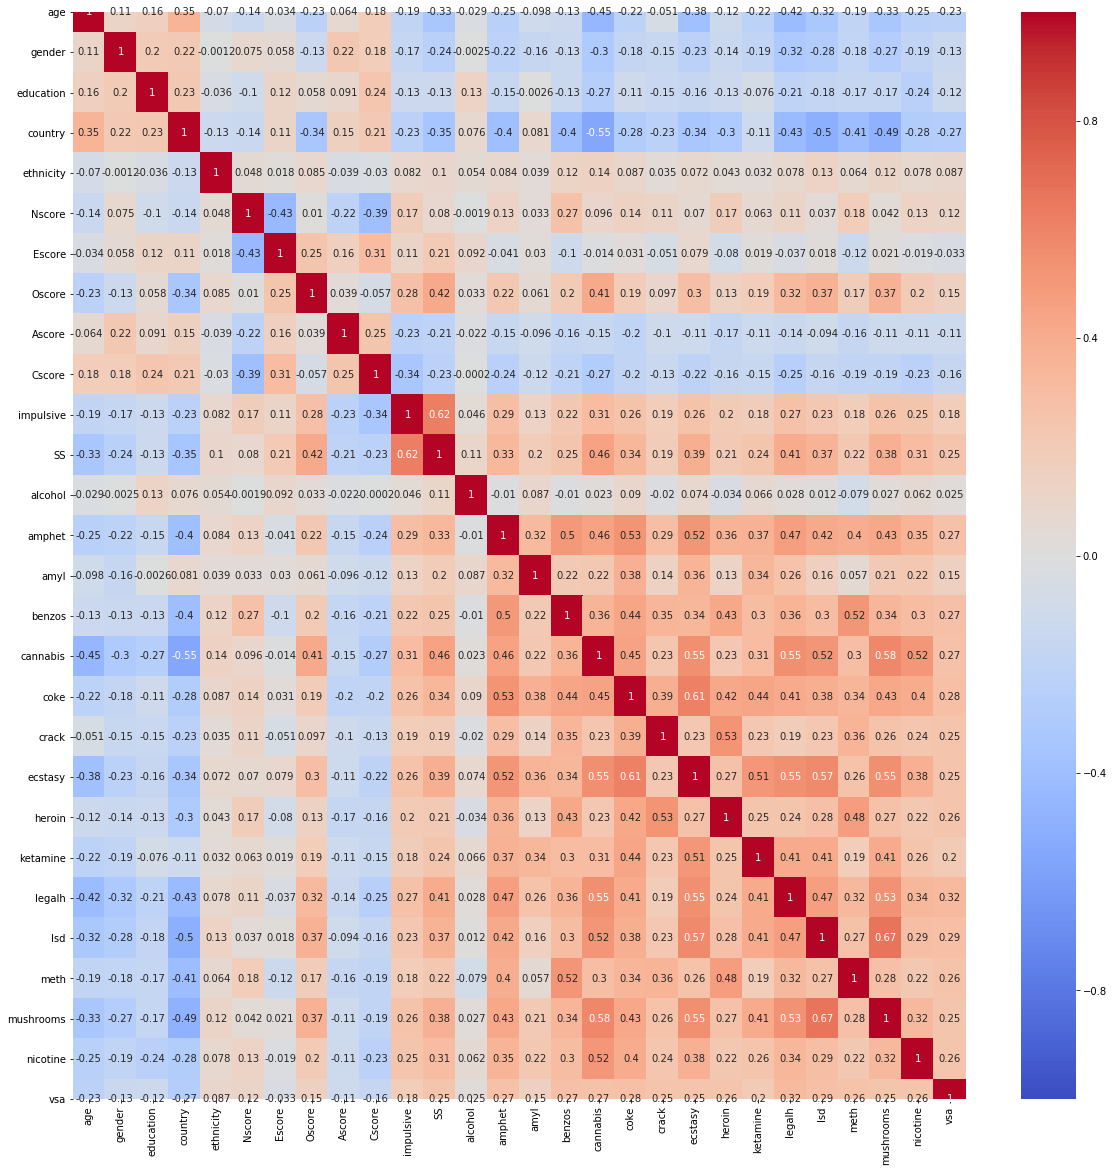

In [159]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(20,20))
# plot the heatmap
sns.heatmap(corr,cmap='coolwarm',
            annot=True, vmin=-1,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

First of all i will change all of the drug columns to binary user/non-user. For this matter i will use this picture as a reference to how addictive a drug is. (https://pikabu.ru/story/tablitsa_fizicheskogo_vreda_i_zavisimosti_ot_narkotikov_40182)
- CL0 Never Used.
- CL1 Used over a Decade Ago.
- CL2 Used in Last Decade.
- CL3 Used in Last Year.
- CL4 Used in Last Month.
- CL5 Used in Last Week.
- CL6 Used in Last Day.

In [165]:
group1 = ['amyl','cannabis','ecstasy','legalh','lsd', 'mushrooms','vsa']
group2 = ['alcohol','amphet','benzos','ketamine','nicotine']
group3 = ['coke','crack','heroin','meth']
for i in range(len(group1)):
    data[group1[i]] = data[group1[i]].replace([0,1,2,3], 0)
    data[group1[i]] = data[group1[i]].replace([4,5,6], 1)
for i in range(len(group2)):
    data[group2[i]] = data[group2[i]].replace([0,1,2], 0)
    data[group2[i]] = data[group2[i]].replace([3,4,5,6], 1)
for i in range(len(group3)):
    data[group3[i]] = data[group3[i]].replace([0,1], 0)
    data[group3[i]] = data[group3[i]].replace([2,3,4,5,6], 1)

id
1       0
2       0
3       0
4       0
5       0
       ..
1884    0
1885    0
1886    1
1887    0
1888    0
Name: amyl, Length: 1885, dtype: int64
id
1       0
2       0
3       0
4       0
5       0
       ..
1884    0
1885    0
1886    0
1887    0
1888    0
Name: amyl, Length: 1885, dtype: int64


In [166]:
data.head()

,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,impulsive,SS,alcohol,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
data1 = data.copy()

In [298]:
for i in range(0,12):
    d = data.iloc[:,i].unique()
    d = np.sort(d)
    a = np.linspace(0,len(d)-1,num = len(d))
    data[data.columns[i]] = data[data.columns[i]].replace(d, a)

In [299]:
data.head()

,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,impulsive,SS,alcohol,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2.0,1.0,5.0,6.0,5.0,27.0,19.0,16.0,17.0,24.0,3.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,8.0,6.0,2.0,17.0,35.0,29.0,28.0,23.0,2.0,5.0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,2.0,0.0,5.0,6.0,2.0,19.0,28.0,14.0,12.0,16.0,1.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,7.0,6.0,2.0,22.0,17.0,20.0,27.0,28.0,1.0,2.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,8.0,6.0,2.0,31.0,11.0,17.0,21.0,32.0,3.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#divide by legal and illegal and make such columns


### hypothesis
1. heroin users also use/used a lot of other drugs.
2. People with high SS, Impulsive and Oscore and low Cscore are taking more drugs than others.
3. drug use does not depend from education or age.

In [181]:
dataH = data[data['heroin'] == 1]
dataH.count()[0]
datanH = data[data['heroin'] == 0]
datanH.count()[0]

1673

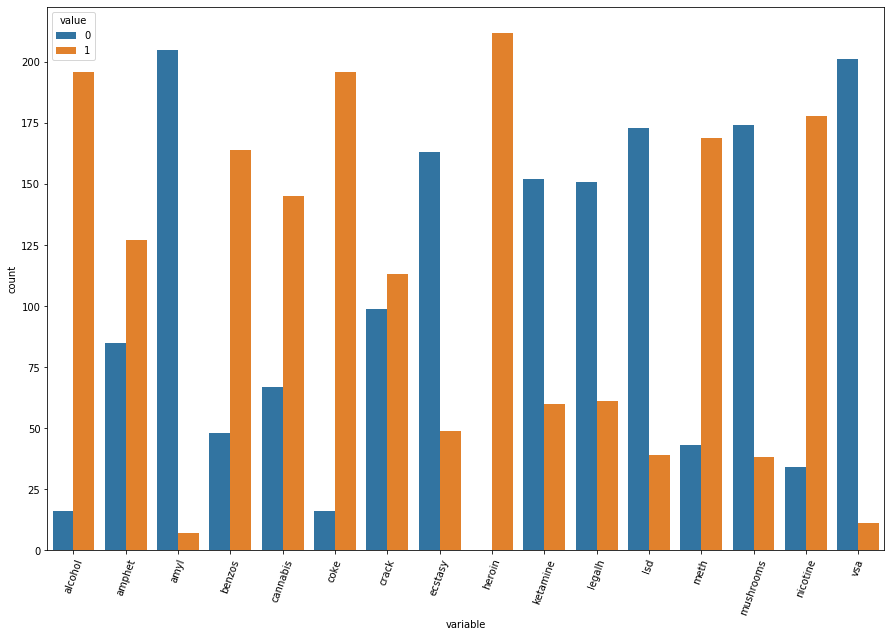

In [180]:

plt.figure(figsize=(15,10))
plt.xticks(rotation=70)
p = sns.countplot(data=pd.melt(dataH.iloc[:,12:]), x = 'variable', hue = 'value')


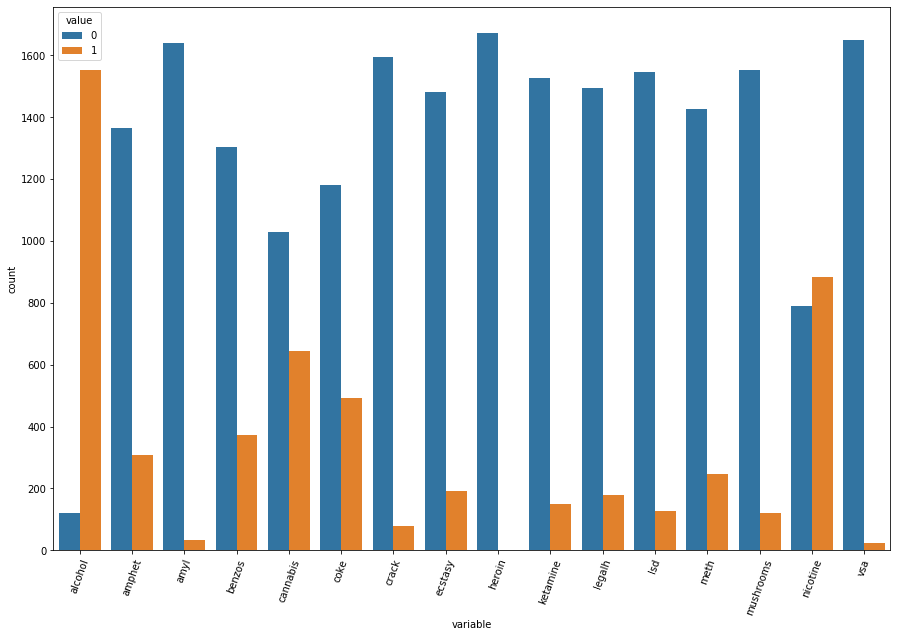

In [182]:

plt.figure(figsize=(15,10))
plt.xticks(rotation=70)
p = sns.countplot(data=pd.melt(datanH.iloc[:,12:]), x = 'variable', hue = 'value')


In [ ]:
# You can definately see that apart from legal alcohol and nicotine non-heroin users take less drugs. I looked at usage
# of drugs at the half point. 5 drugs surpased that point for heron users and 0 for non-heroin users. 

In [205]:
#SS, Impulsive and Oscore and low Cscore
mSS= data['SS'].mean()
mImp= data['impulsive'].mean()
mOs =data['Oscore'].mean()
mCs= data['Cscore'].mean()


In [206]:
dSS = data[data['SS']> mSS]
dImp = data[data['impulsive']> mImp]
dOs = data[data['Oscore']> mOs]
dCs = data[data['Cscore']< mCs]

In [210]:
dSS.shape

(992, 28)

In [228]:
dSS['User'] = dSS['alcohol'].copy()
dImp['User'] = dImp['alcohol'].copy()
dOs['User'] = dOs['alcohol'].copy()
dCs['User'] = dCs['alcohol'].copy()

C:\Conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

### NO alcohol included

In [243]:
for i in range(0, dSS.shape[0]):
    temp = dSS.iloc[:,13:28]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): dSS.iloc[i,28] = 1
    if (temp1[temp1 == 1].count() == 0): dSS.iloc[i,28] = 0

In [244]:
for i in range(0, dImp.shape[0]):
    temp = dImp.iloc[:,13:28]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): dImp.iloc[i,28] = 1
    if (temp1[temp1 == 1].count() == 0): dImp.iloc[i,28] = 0

In [245]:
for i in range(0, dOs.shape[0]):
    temp = dOs.iloc[:,13:28]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): dOs.iloc[i,28] = 1
    if (temp1[temp1 == 1].count() == 0): dOs.iloc[i,28] = 0

In [246]:
for i in range(0, dCs.shape[0]):
    temp = dCs.iloc[:,13:28]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): dCs.iloc[i,28] = 1
    if (temp1[temp1 == 1].count() == 0): dCs.iloc[i,28] = 0

In [300]:
dSS

,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,impulsive,SS,alcohol,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,vsa,User
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.49788,-0.48246,5.0,6.0,2.0,19.0,28.0,14.0,12.0,16.0,1.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1.09449,-0.48246,7.0,0.0,2.0,19.0,15.0,17.0,21.0,30.0,3.0,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
11,-0.07854,0.48246,6.0,6.0,2.0,14.0,28.0,12.0,18.0,35.0,4.0,6.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
12,1.09449,-0.48246,4.0,2.0,2.0,12.0,23.0,21.0,10.0,20.0,5.0,9.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1
13,1.82213,0.48246,6.0,6.0,2.0,44.0,24.0,23.0,12.0,18.0,7.0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,-0.95197,-0.48246,4.0,2.0,2.0,16.0,25.0,22.0,21.0,22.0,6.0,8.0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,0,1
1884,-0.95197,0.48246,4.0,0.0,2.0,13.0,34.0,31.0,28.0,15.0,6.0,10.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1885,-0.95197,-0.48246,4.0,0.0,2.0,21.0,34.0,24.0,28.0,12.0,6.0,8.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1


In [209]:
temp = dSS.iloc[:,12:]
temp1 = temp.iloc[1,:]
temp1[temp1 == 1].count()

2

In [248]:
dSS[dSS["User"] ==1].index

Int64Index([   7,   11,   12,   13,   15,   26,   28,   35,   50,   55,
            ...
            1877, 1878, 1879, 1880, 1881, 1883, 1884, 1885, 1887, 1888],
           dtype='int64', name='id', length=867)

In [249]:
len(np.intersect1d(dSS[dSS["User"] ==1].index, dImp[dImp["User"] ==1].index))

619

In [250]:
inter = [[0 for x in range(4)] for y in range(4)] 

In [252]:
names = [dSS,dImp,dOs,dCs]
for i in range(0,4):
    for j in range(0,4):
        inter[i][j] = len(np.intersect1d(names[i][names[i]["User"] ==1].index, names[j][names[j]["User"] ==1].index))

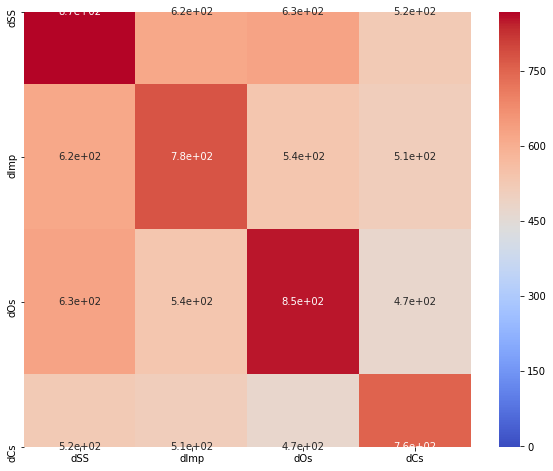

In [296]:
plt.figure(figsize=(10,8))
# plot the heatmap
sns.heatmap(inter,cmap='coolwarm',
            annot=True, vmin=-1,xticklabels=['dSS','dImp','dOs','dCs'],
    yticklabels=['dSS','dImp','dOs','dCs'])

In [ ]:
# all of the intercestions of data (quite a lot). This is good.

In [256]:
total_int = np.intersect1d(np.intersect1d(np.intersect1d(dSS[dSS["User"] ==1].index, dImp[dImp["User"] ==1].index),
                           dOs[dOs["User"] ==1].index),dCs[dCs["User"] ==1].index)

In [257]:
len(total_int)

291

In [259]:
total = np.intersect1d(np.intersect1d(np.intersect1d(dSS.index, dImp.index),
                           dOs.index),dCs.index)

In [260]:
len(total)

301

In [284]:
data_t = data.copy()
data_t.drop(index=total, axis = 0, inplace= True)

In [288]:
data_t['User'] = data_t['alcohol'].copy()

In [303]:
for i in range(0, data_t.shape[0]):
    temp = data_t.iloc[:,13:28]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): data_t.iloc[i,28] = 1
    if (temp1[temp1 == 1].count() == 0): data_t.iloc[i,28] = 0

In [304]:
data_t[data_t['User'] ==0].count()[0]

509

In [307]:
print("non-Drug users in full dataset w/o group of interest:",data_t[data_t['User'] ==0].count()[0]/data_t[data_t['User'] ==1].count()[0]*100, '%')
print("non-Drug users in group of interest:",(len(total) -len(total_int))/len(total)*100, '%')

non-Drug users in full dataset w/o group of interest: 47.348837209302324 %
non-Drug users in group of interest: 3.322259136212625 %


In [308]:
# Almost half of clean people in full dataset w/o group of interest and only 3% of clean people in gruop of interest.
#I think it confirms the hypotheses.

### Still ignoring alcohol

In [312]:
data3 = data.copy()

In [313]:
data3['User'] = data3['alcohol'].copy()
for i in range(0, data3.shape[0]):
    temp = data3.iloc[:,13:28]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): data3.iloc[i,28] = 1
    if (temp1[temp1 == 1].count() == 0): data3.iloc[i,28] = 0

[24, 71, 25, 87, 474, 185, 296, 151, 53]


Text(0, 0.5, 'Users')

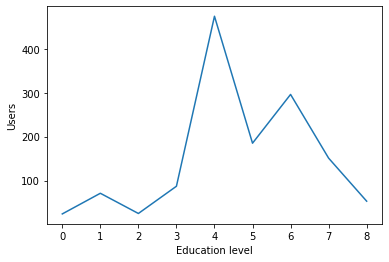

In [317]:
users = [0 for x in range(len(data3["education"].unique()))]
for i in range(len(data3["education"].unique())):
    tmp = data3[data3['education'] == i]
    users[i] = tmp[tmp['User'] ==1].count()[0]
plt.plot(np.sort(data3["education"].unique()),users)
plt.xlabel('Education level')
plt.ylabel("Users")
# Uneven data for diffrent education levels makes a plot look this way

Text(0, 0.5, 'Normalized Users')

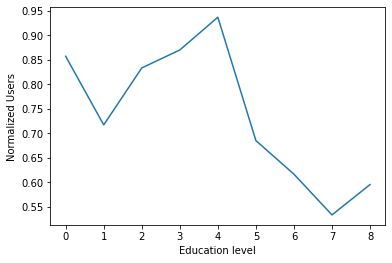

In [319]:
for i in range(len(data3["education"].unique())):
    tmp = data3[data3['education'] == i]
    users[i] = tmp[tmp['User'] ==1].count()[0]/tmp.count()[0]
plt.plot(np.sort(data3["education"].unique()),users)
plt.xlabel('Education level')
plt.ylabel("Normalized Users")
#To overcome uneveness i made a normalized plot, but still there is a peak at level 4. So there is a tendency after all.

Text(0, 0.5, 'Users')

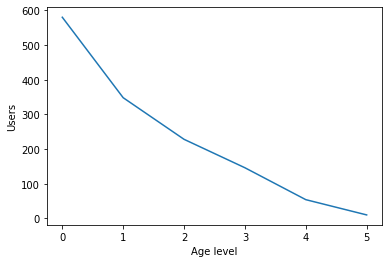

In [320]:
users = [0 for x in range(len(data3["age"].unique()))]
for i in range(len(data3["age"].unique())):
    tmp = data3[data3['age'] == i]
    users[i] = tmp[tmp['User'] ==1].count()[0]
plt.plot(np.sort(data3["age"].unique()),users)
plt.xlabel('Age level')
plt.ylabel("Users")

Text(0, 0.5, 'Normalized Users')

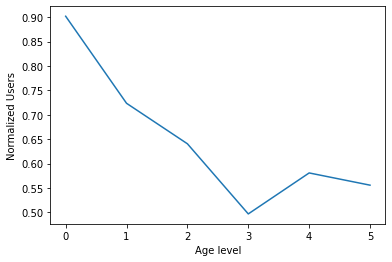

In [322]:
users = [0 for x in range(len(data3["age"].unique()))]
for i in range(len(data3["age"].unique())):
    tmp = data3[data3['age'] == i]
    users[i] = tmp[tmp['User'] ==1].count()[0]/tmp.count()[0]
plt.plot(np.sort(data3["age"].unique()),users)
plt.xlabel('Age level')
plt.ylabel("Normalized Users")
# This is interesting data. You would think that people get smarter over time and stop using drugs, but it looks like
# it's not actually the case. Level 4 starts at 55 years, close to retirement age in civilized countries. Maybe there 
# is a correlation here:)

### Metrics and validation

In [ ]:
# As a target variable i want to set illegal drug use.

In [331]:
data['User_L'] = data['alcohol'].copy()
for i in range(0, data.shape[0]):
    temp = data.iloc[:,[12,26]]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): data.iloc[i,28] = 1
    if (temp1[temp1 == 1].count() == 0): data.iloc[i,28] = 0

In [333]:
data.drop('alcohol',axis=1, inplace=True)
data.drop('nicotine',axis =1, inplace=True)

In [340]:
data['User_IL'] = data['amphet'].copy()
for i in range(0, data.shape[0]):
    temp = data.iloc[:,12:26]
    temp1 = temp.iloc[i,:]
    if (temp1[temp1 == 1].count() > 0): data.iloc[i,27] = 1
    if (temp1[temp1 == 1].count() == 0): data.iloc[i,27] = 0

In [342]:
data.drop(data.iloc[:,12:26], axis =1, inplace=True)

In [343]:
data.head()

,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,impulsive,SS,User_L,User_IL
id,,,,,,,,,,,,,,
1,2.0,1.0,5.0,6.0,5.0,27.0,19.0,16.0,17.0,24.0,3.0,2.0,1,0
2,1.0,0.0,8.0,6.0,2.0,17.0,35.0,29.0,28.0,23.0,2.0,5.0,1,1
3,2.0,0.0,5.0,6.0,2.0,19.0,28.0,14.0,12.0,16.0,1.0,7.0,1,0
4,0.0,1.0,7.0,6.0,2.0,22.0,17.0,20.0,27.0,28.0,1.0,2.0,1,1
5,2.0,1.0,8.0,6.0,2.0,31.0,11.0,17.0,21.0,32.0,3.0,5.0,1,0


In [348]:
print(data[data['User_IL'] ==0].count()[0]/data.shape[0]*100, "%")
print(data[data['User_IL'] ==1].count()[0]/data.shape[0]*100, "%")
#A little bit uneven

37.3474801061008 %
62.6525198938992 %


In [ ]:
# We have 3 quality metrics: accuracy, precision and recall. I guess in my case it is a not that great to use accuracy, but 
#still possible as i have almost 50-50 data split. Not sure which one to use out of recision and recall. So maybe i
# will just use f1 score.

In [351]:
y = data['User_IL']
X = data.drop('User_IL', axis = 1)

In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [369]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder
model = LogisticRegression()


In [412]:
clf = make_pipeline(OneHotEncoder(categorical_features=[0,2,3,4]), LogisticRegression(solver='lbfgs',C=7, penalty='l2'))
#C =7 is from future.

In [413]:
clf.fit(X_train,y_train)


C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Conda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(categorical_features=[0, 2, 3, 4],
                               categories=None, drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=True)),
                ('logisticregression',
                 LogisticRegression(C=7, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [414]:
print(len(clf['logisticregression'].coef_[0])) # Onehotencoder works

38


In [415]:
y_pred = clf.predict(X_test)

In [416]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Accuracy', accuracy_score(y_train, clf.predict(X_train)))
print('Precision', precision_score(y_train, clf.predict(X_train)))
print('Recall', recall_score(y_train, clf.predict(X_train)))
print('f1', f1_score(y_train, clf.predict(X_train)))
print("----Test-----")
print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))
print('f1', f1_score(y_test, clf.predict(X_test)))

Accuracy 0.8365180467091295
Precision 0.8758620689655172
Recall 0.8610169491525423
f1 0.8683760683760683
----Test-----
Accuracy 0.8029661016949152
Precision 0.8536585365853658
Recall 0.8277027027027027
f1 0.8404802744425386


In [418]:
C = np.linspace(-5,5,num=11)
C10 = 10 ** C
print(C10)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]


In [419]:
cv_model = LogisticRegressionCV(solver='lbfgs', max_iter=1000, cv=5,Cs=C10,scoring='f1')
clf_cv = make_pipeline(OneHotEncoder(categorical_features=[0,2,3,4]), cv_model)
clf_cv.fit(X_train,y_train)

C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(categorical_features=[0, 2, 3, 4],
                               categories=None, drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=True)),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                                      class_weight=None, cv=5, dual=False,
                                      fit_intercept=True, intercept_scaling=1.0,
                                      l1_ratios=None, max_iter=1000,
                                      multi_class='warn', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      refit=True, scoring='f1', solver='lbfgs',
        

In [420]:
print('Accuracy', accuracy_score(y_train, clf_cv.predict(X_train)))
print('Precision', precision_score(y_train, clf_cv.predict(X_train)))
print('Recall', recall_score(y_train, clf_cv.predict(X_train)))
print('f1', f1_score(y_train, clf_cv.predict(X_train)))
print(clf_cv['logisticregressioncv'].C_)
print("----Test-----")
print('Accuracy', accuracy_score(y_test, clf_cv.predict(X_test)))
print('Precision', precision_score(y_test, clf_cv.predict(X_test)))
print('Recall', recall_score(y_test, clf_cv.predict(X_test)))
print('f1', f1_score(y_test, clf_cv.predict(X_test)))
#best C is 10, need to change Cs range

Accuracy 0.8393489030431706
Precision 0.8772935779816514
Recall 0.864406779661017
f1 0.8708025042686398
[10.]
----Test-----
Accuracy 0.8008474576271186
Precision 0.8531468531468531
Recall 0.8243243243243243
f1 0.8384879725085911


In [421]:
C_close = np.linspace(2,12,num=11)
print(C)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [422]:
cv_model = LogisticRegressionCV(solver='lbfgs', max_iter=1000, cv=5,Cs=C_close,scoring='f1')
clf_cv = make_pipeline(OneHotEncoder(categorical_features=[0,2,3,4]), cv_model)
clf_cv.fit(X_train,y_train)

C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(categorical_features=[0, 2, 3, 4],
                               categories=None, drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=True)),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
                                      class_weight=None, cv=5, dual=False,
                                      fit_intercept=True, intercept_scaling=1.0,
                                      l1_ratios=None, max_iter=1000,
                                      multi_class='warn', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      refit=True, scoring='f1', solver='lbfgs',
                                      tol=0.0001

In [423]:
print('Accuracy', accuracy_score(y_train, clf_cv.predict(X_train)))
print('Precision', precision_score(y_train, clf_cv.predict(X_train)))
print('Recall', recall_score(y_train, clf_cv.predict(X_train)))
print('f1', f1_score(y_train, clf_cv.predict(X_train)))
print(clf_cv['logisticregressioncv'].C_)
print("----Test-----")
print('Accuracy', accuracy_score(y_test, clf_cv.predict(X_test)))
print('Precision', precision_score(y_test, clf_cv.predict(X_test)))
print('Recall', recall_score(y_test, clf_cv.predict(X_test)))
print('f1', f1_score(y_test, clf_cv.predict(X_test)))

Accuracy 0.8393489030431706
Precision 0.8772935779816514
Recall 0.864406779661017
f1 0.8708025042686398
[7.]
----Test-----
Accuracy 0.8008474576271186
Precision 0.8531468531468531
Recall 0.8243243243243243
f1 0.8384879725085911


In [424]:
#can't get better than this. LogisticRegressionCV automatically selects C using embedded cross-validation

In [425]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [428]:
stf = StratifiedKFold(n_splits=10,shuffle=True)
cv = stf.split(X_train,y_train)

scores = cross_val_score(clf_cv, X, y, scoring='f1', cv=cv)

C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Conda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currentl

In [429]:
print(scores.mean())

0.8506658939693622


### Trees

In [430]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [432]:
clf_R = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[50, 100, 200, 300], 
                    'max_depth':[2, 3, 4]
                   },
                   scoring='f1', cv=5, n_jobs = -1)
clf_R.fit(X, y)
print(clf_R.best_score_)
print(clf_R.best_params_)
#Got to the borders, need different parameters

0.8444922330078711
{'max_depth': 4, 'n_estimators': 300}


In [433]:
print(cross_val_score(clf_R, X, y, cv=3).mean())

0.8247186613330335


In [434]:
clf_R = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[300,500,700,1000], 
                    'max_depth':[ 4,6,10]
                   },
                   scoring='f1', cv=5, n_jobs = -1)
clf_R.fit(X, y)
print(clf_R.best_score_)
print(clf_R.best_params_)
#same stuff

0.8490527557658276
{'max_depth': 10, 'n_estimators': 500}


In [435]:
print(cross_val_score(clf_R, X, y, cv=3).mean())

0.8297420348533091


In [436]:
clf_R = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[400,450,550,600], 
                    'max_depth':[10,12,14,16]
                   },
                   scoring='f1', cv=5, n_jobs = -1)
clf_R.fit(X, y)
print(clf_R.best_score_)
print(clf_R.best_params_)
#no_luck

0.8532420716361178
{'max_depth': 16, 'n_estimators': 600}


In [438]:
clf_R = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[550,600,650,700], 
                    'max_depth':[12,14,16,18]
                   },
                   scoring='f1', cv=5, n_jobs = -1)
clf_R.fit(X, y)
print(clf_R.best_score_)
print(clf_R.best_params_)
#in the middle of both ranges,great!

0.8535028219974123
{'max_depth': 16, 'n_estimators': 650}


In [443]:
print("----Test-----")
print('Accuracy', accuracy_score(y_test, clf_R.predict(X_test)))
print('Precision', precision_score(y_test, clf_R.predict(X_test)))
print('Recall', recall_score(y_test, clf_R.predict(X_test)))
print('f1', f1_score(y_test, clf_R.predict(X_test)))
#Funny

----Test-----
Accuracy 1.0
Precision 1.0
Recall 1.0
f1 1.0


In [441]:
clf_plot = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[300,400,550,600,650,700], 
                    'max_depth':[2,4,6,8,10,12,14,16,18]
                   },
                   scoring='f1', cv=5, n_jobs = -1)
clf_plot.fit(X, y)
print(clf_plot.best_score_)
print(clf_plot.best_params_)

0.8540649882495938
{'max_depth': 12, 'n_estimators': 400}


In [444]:
print("----Test-----")
print('Accuracy', accuracy_score(y_test, clf_plot.predict(X_test)))
print('Precision', precision_score(y_test, clf_plot.predict(X_test)))
print('Recall', recall_score(y_test, clf_plot.predict(X_test)))
print('f1', f1_score(y_test, clf_plot.predict(X_test)))
#the best_score_ is better here, though

----Test-----
Accuracy 0.9851694915254238
Precision 1.0
Recall 0.9763513513513513
f1 0.988034188034188


In [446]:
clf_plot.cv_results_['mean_test_score']

array([0.83719226, 0.83992005, 0.83595216, 0.83707137, 0.83738578,
       0.83735716, 0.84291994, 0.84434874, 0.84409278, 0.84344079,
       0.84176137, 0.84347569, 0.84875859, 0.84727342, 0.84561036,
       0.84667974, 0.84618776, 0.84491804, 0.8446625 , 0.84752883,
       0.84384212, 0.84695073, 0.84786481, 0.84709591, 0.84939739,
       0.84740441, 0.85252463, 0.84811424, 0.84665031, 0.84722964,
       0.85050466, 0.85406499, 0.85155493, 0.84844922, 0.84637297,
       0.84987833, 0.85021459, 0.84789858, 0.85120479, 0.85060484,
       0.8482151 , 0.84603374, 0.84880311, 0.85226343, 0.84776395,
       0.8516696 , 0.85105804, 0.85068564, 0.84616497, 0.85126882,
       0.84866247, 0.84975011, 0.8509756 , 0.8521917 ])

In [450]:
clf_plot.cv_results_['param_max_depth']

masked_array(data=[2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6,
                   8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 12, 12, 12,
                   12, 12, 12, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16,
                   16, 18, 18, 18, 18, 18, 18],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False],
       fill_value='?',
            dtype=object)

In [452]:
clf_plot1 = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[500], 
                    'max_depth':[1,2,4,6,8,10,12,14,16,18,20,22]
                   },
                   scoring='f1', cv=5, n_jobs = -1)
clf_plot1.fit(X, y)
print(clf_plot1.best_score_)
print(clf_plot1.best_params_)

0.8523781165358291
{'max_depth': 12, 'n_estimators': 500}


In [453]:
print("----Test-----")
print('Accuracy', accuracy_score(y_test, clf_plot.predict(X_test)))
print('Precision', precision_score(y_test, clf_plot.predict(X_test)))
print('Recall', recall_score(y_test, clf_plot.predict(X_test)))
print('f1', f1_score(y_test, clf_plot.predict(X_test)))

----Test-----
Accuracy 0.9851694915254238
Precision 1.0
Recall 0.9763513513513513
f1 0.988034188034188


In [455]:
clf_plot1.cv_results_['param_max_depth']

masked_array(data=[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object)

In [460]:
import numpy.ma as ma

In [461]:
X_plot = ma.getdata(clf_plot1.cv_results_['param_max_depth'])

In [459]:
clf_plot1.cv_results_['mean_test_score']

array([0.80225369, 0.83579554, 0.84453362, 0.84662537, 0.84736093,
       0.84996099, 0.85237812, 0.85025856, 0.84995241, 0.85187361,
       0.85050758, 0.85045705])

Text(0, 0.5, 'Score')

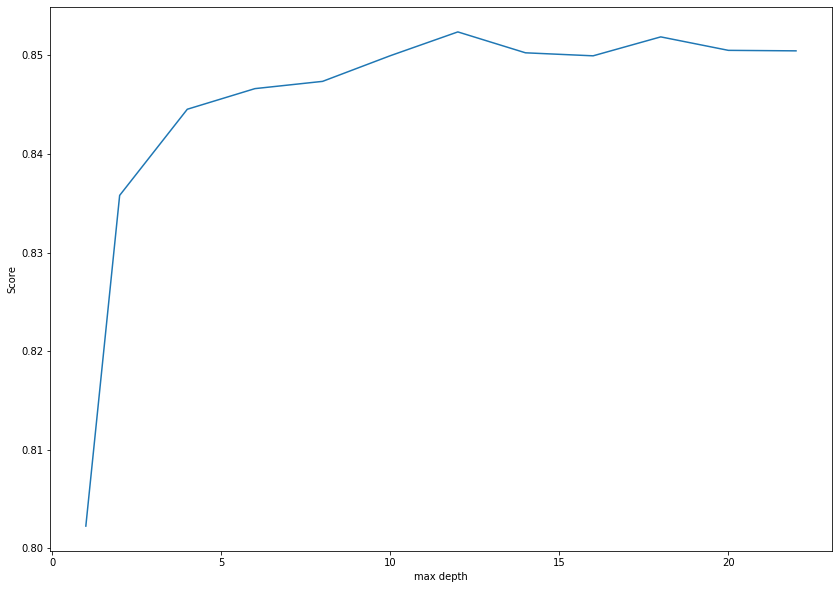

In [464]:
plt.figure(figsize=(14,10))
plt.plot(X_plot,clf_plot1.cv_results_['mean_test_score'])
plt.xlabel('max depth')
plt.ylabel('Score')

In [ ]:
# I hate precision_recall_curve with a passion, because when i pressed shift+enter on this function my hard drive broke with 
#all of the save files.
# I am doing the same stuff for the second time right now.

In [465]:
y_prob = clf_plot.predict_proba(X_test)[:, 1]

Text(0.5, 1.0, 'TReees')

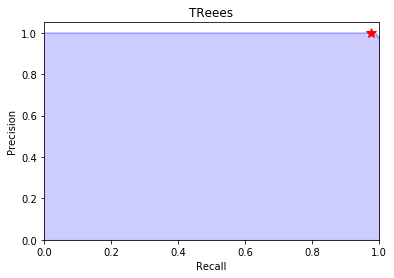

In [469]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

y_pred = clf_plot.predict(X_test)
plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("TReees")

In [470]:
y_prob = clf_cv.predict_proba(X_test)[:, 1]

Text(0.5, 1.0, 'Logistic')

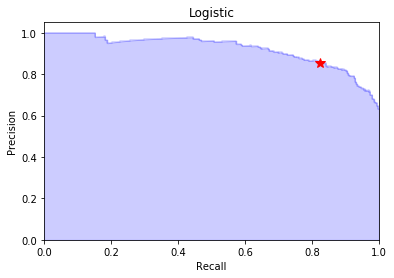

In [471]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

y_pred = clf_cv.predict(X_test)
plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Logistic")

### So, for both of the clasifiers the star is at the top right corner, meaning it is a good classifier. For trees it is very very close to perfect. Both of the clasifiers turned out to be great!